In [7]:
import numpy as np
import subprocess
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [8]:
# Get the current working directory
current_directory = os.getcwd()

# Print the current directory
print("Current Working Directory:", current_directory)

Current Working Directory: /Users/zuhair/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research/current-projects/strain-rate-seismicity/ntbk


In [9]:
# # Define utility functions
# def filter_by_bounding_box(velfield, bounding_box):
#     """Filter the velocity field data by a given bounding box."""
#     filtered = velfield[
#         (velfield['Lon'] >= bounding_box[0]) &
#         (velfield['Lon'] <= bounding_box[1]) &
#         (velfield['Lat'] >= bounding_box[2]) &
#         (velfield['Lat'] <= bounding_box[3])
#     ]
#     return filtered

# def create_model_velfield(xdata, ydata, Ve, Vn, observed_velfield):
#     """Create a model velocity field based on the interpolated velocities."""
#     model_velfield = observed_velfield.copy()
#     model_velfield['Ve'] = Ve.flatten()
#     model_velfield['Vn'] = Vn.flatten()
#     return model_velfield

# def subtract_two_velfields(observed_velfield, model_velfield):
#     """Subtract two velocity fields to get residual velocities."""
#     residual_velfield = observed_velfield.copy()
#     residual_velfield['Ve'] = observed_velfield['Ve'] - model_velfield['Ve']
#     residual_velfield['Vn'] = observed_velfield['Vn'] - model_velfield['Vn']
#     return residual_velfield

# def get_string_range(range_values, x_buffer=0, y_buffer=0):
#     """Get a range string for GMT commands."""
#     return f"{range_values[0]-x_buffer}/{range_values[1]+x_buffer}/{range_values[2]-y_buffer}/{range_values[3]+y_buffer}"

# def get_string_inc(inc_values):
#     """Get an increment string for GMT commands."""
#     return f"{inc_values[0]}/{inc_values[1]}"

# def strain_on_regular_grid(xinc, yinc, udata, vdata):
#     """Calculate strain tensor components on a regular grid and extend to dilatation and second invariant."""
#     exx = np.gradient(udata, xinc, axis=1)  # Normal strain in the x-direction
#     eyy = np.gradient(vdata, yinc, axis=0)  # Normal strain in the y-direction
#     exy = 0.5 * (np.gradient(udata, yinc, axis=0) + np.gradient(vdata, xinc, axis=1))  # Shear strain
#     rot = 0.5 * (np.gradient(vdata, xinc, axis=1) - np.gradient(udata, yinc, axis=0))  # Rotational component
    
#     max_shear = 0.5*(np.sqrt((exx - eyy)**2 + 4*exy**2)) ## Based on Maurer and Materna (2023)

#     # Calculate Dilatation
#     dilatation = exx + eyy
    
#     # Calculate Second Invariant
#     second_invariant = np.sqrt((exx**2 + eyy**2 + 2*exy**2))
# #     second_invariant = 0.5 * ((exx * eyy) - (exy**2))
    
#     return exx, eyy, exy, rot, max_shear, dilatation, second_invariant

# # Define the gpsgridder class
# class gpsgridder:
#     def __init__(self, params):
#         self._grid_inc = params['inc']
#         self._strain_range = params['range_strain']
#         self._xdata = params['xdata']
#         self._ydata = params['ydata']
#         self._tempdir = params['outdir']
#         self._poisson, self._fd, self._eigenvalue = self.verify_inputs_gpsgridder(params['method_specific'])

#     def verify_inputs_gpsgridder(self, method_specific_dict):
#         if 'poisson' not in method_specific_dict:
#             raise ValueError("gps_gridder requires poisson's ratio. Please add to method_specific config.")
#         if 'fd' not in method_specific_dict:
#             raise ValueError("gps_gridder requires fudge factor fd. Please add to method_specific config.")
#         if 'eigenvalue' not in method_specific_dict:
#             raise ValueError("gps_gridder requires eigenvalue. Please add to method_specific config.")
#         return method_specific_dict["poisson"], method_specific_dict["fd"], method_specific_dict["eigenvalue"]

#     def compute(self, myVelfield):
#         Ve, Vn, rot_grd, exx_grd, exy_grd, eyy_grd, max_shear_grd, dilatation_grd, second_invariant_grd = self.compute_gpsgridder(myVelfield)
#         return max_shear_grd

#     def compute_gpsgridder(self, myVelfield):
#         print("Computing strain via gpsgridder method.")
#         myVelfield.to_csv("tempgps.txt", sep=' ', index=False, header=False)
#         command = f"gmt gpsgridder tempgps.txt -R{get_string_range(self._strain_range, self._grid_inc[0]/2, self._grid_inc[1]/2)} -I{get_string_inc(self._grid_inc)} -S{self._poisson} -Fd{self._fd} -C{self._eigenvalue} -Emisfitfile.txt -fg -r -Gnc_%s.nc"
#         print(command)
#         subprocess.call(command, shell=True)

#         subprocess.call(['rm', 'tempgps.txt'], shell=False)
#         subprocess.call(['rm', 'gmt.history'], shell=False)
#         subprocess.call(['mv', 'misfitfile.txt', self._tempdir], shell=False)
#         subprocess.call(['mv', 'nc_u.nc', self._tempdir], shell=False)
#         subprocess.call(['mv', 'nc_v.nc', self._tempdir], shell=False)

#         file1 = os.path.join(self._tempdir, "nc_u.nc")
#         file2 = os.path.join(self._tempdir, "nc_v.nc")
#         ds_u = xr.open_dataset(file1)
#         ds_v = xr.open_dataset(file2)
#         udata = ds_u["z"].to_numpy()
#         vdata = ds_v["z"].to_numpy()

#         xinc = float(subprocess.check_output(f'gmt grdinfo -M -C {file1} | awk \'{{print $8}}\'', shell=True)) * 111.000 * np.cos(np.deg2rad(self._strain_range[2]))
#         yinc = float(subprocess.check_output(f'gmt grdinfo -M -C {file1} | awk \'{{print $9}}\'', shell=True)) * 111.000

#         exx, eyy, exy, rot, max_shear, dilatation, second_invariant = strain_on_regular_grid(xinc, yinc, udata * 1000, vdata * 1000)
        
#         # Dynamically adjust the coordinates to match the data shape
#         lat_size, lon_size = max_shear.shape
#         ydata_adjusted = np.linspace(self._strain_range[2], self._strain_range[3], lat_size)
#         xdata_adjusted = np.linspace(self._strain_range[0], self._strain_range[1], lon_size)
        
#         # Save the max_shear, dilatation, and second_invariant components as NetCDF files
#         max_shear_da = xr.DataArray(max_shear, coords=[ydata_adjusted, xdata_adjusted], dims=["latitude", "longitude"])
#         max_shear_ds = xr.Dataset({"max_shear": max_shear_da})
#         max_shear_file = os.path.join(self._tempdir, f"I{self._grid_inc[0]}_max_shear.nc")
#         max_shear_ds.to_netcdf(max_shear_file)
        
#         dilatation_da = xr.DataArray(dilatation, coords=[ydata_adjusted, xdata_adjusted], dims=["latitude", "longitude"])
#         dilatation_ds = xr.Dataset({"dilatation": dilatation_da})
#         dilatation_file = os.path.join(self._tempdir, f"I{self._grid_inc[0]}_dilatation.nc")
#         dilatation_ds.to_netcdf(dilatation_file)
        
#         second_invariant_da = xr.DataArray(second_invariant, coords=[ydata_adjusted, xdata_adjusted], dims=["latitude", "longitude"])
#         second_invariant_ds = xr.Dataset({"second_invariant": second_invariant_da})
#         second_invariant_file = os.path.join(self._tempdir, f"I{self._grid_inc[0]}_second_invariant.nc")
#         second_invariant_ds.to_netcdf(second_invariant_file)

#         print("Success computing strain via gpsgridder method.")
#         return udata, vdata, abs(rot), exx, exy, eyy, max_shear, dilatation, second_invariant

# # Read the configuration file
# grid_sizes = [0.1, 0.3, 0.5]

# for grid_size in grid_sizes:
#     params = {
#         'inc': [grid_size, grid_size],
#         'range_strain': [95, 98, 16, 28],
#         'range_data': [95, 98, 16, 28],
#         'xdata': np.linspace(95, 98, int((98 - 95) / grid_size) + 1),  # Ensure it matches the grid size
#         'ydata': np.linspace(16, 28, int((28 - 16) / grid_size) + 1),  # Ensure it matches the grid size
#         'outdir': 'Output_gpsgridder',
#         'method_specific': {
#             'poisson': 0.5,
#             'fd': 0.01,
#             'eigenvalue': 0.0001
#         }
#     }

#     # Ensure the output directory exists
#     if not os.path.exists(params['outdir']):
#         os.makedirs(params['outdir'])

#     # Read the velocity field data
#     input_file = '/Users/zuhair/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research/current-projects/strain-rate-seismicity/data/mymr_vel_space_ITRF2014.txt'
#     vel_field_data = pd.read_csv(input_file, delim_whitespace=True, names=['Lon', 'Lat', 'Ve', 'Vn', 'Vu', 'Se', 'Sn', 'Su', 'Name'])

#     # Convert columns to numeric
#     vel_field_data['Lon'] = pd.to_numeric(vel_field_data['Lon'], errors='coerce')
#     vel_field_data['Lat'] = pd.to_numeric(vel_field_data['Lat'], errors='coerce')

#     # Initialize and compute strain using gpsgridder
#     strain_model = gpsgridder(params)
#     max_shear_grd = strain_model.compute(vel_field_data)

#     # The max_shear.nc file should now be saved in the output directory

In [10]:
# # Plot the results
# fig, axes = plt.subplots(1, len(grid_sizes), dpi = 300, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# for ax, grid_size in zip(axes, grid_sizes):
#     max_shear_file = os.path.join('Output_gpsgridder', f'I{grid_size}_max_shear.nc')
#     ds = xr.open_dataset(max_shear_file)
#     max_shear = ds['max_shear']

#     # Plot the max shear strain
#     c = ax.pcolormesh(max_shear['longitude'], max_shear['latitude'], max_shear, transform=ccrs.PlateCarree(), cmap='Blues')
#     ax.coastlines(resolution='10m', color='black', linewidth=0.3)
#     ax.set_title(f'{grid_size}˚x{grid_size}˚')
#     gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.1, linestyle='-')
#     gl.top_labels = False
#     gl.right_labels = False
#     gl.xlabel_style = {'size': 10, 'color': 'black', 'rotation': 0}
#     gl.ylabel_style = {'size': 10, 'color': 'black'}

# # Add a single colorbar for all subplots
# fig.colorbar(c, ax=axes.ravel().tolist(), orientation='vertical', pad=0.02, aspect=50, label='Max Shear Strain')

# # # Save the figure to an 'output' folder
# # output_dir = 'output'
# # if not os.path.exists(output_dir):
# #     os.makedirs(output_dir)
# # plt.savefig(os.path.join(output_dir, 'strain_rate_comparison.png'), bbox_inches='tight')

# # Display the plot
# plt.show()

In [11]:
import os
import subprocess
import numpy as np
import pandas as pd
import xarray as xr

# Define utility functions (assuming these are correct and as provided)
def filter_by_bounding_box(velfield, bounding_box):
    """Filter the velocity field data by a given bounding box."""
    filtered = velfield[
        (velfield['Lon'] >= bounding_box[0]) &
        (velfield['Lon'] <= bounding_box[1]) &
        (velfield['Lat'] >= bounding_box[2]) &
        (velfield['Lat'] <= bounding_box[3])
    ]
    return filtered

def create_model_velfield(xdata, ydata, Ve, Vn, observed_velfield):
    """Create a model velocity field based on the interpolated velocities."""
    model_velfield = observed_velfield.copy()
    model_velfield['Ve'] = Ve.flatten()
    model_velfield['Vn'] = Vn.flatten()
    return model_velfield

def subtract_two_velfields(observed_velfield, model_velfield):
    """Subtract two velocity fields to get residual velocities."""
    residual_velfield = observed_velfield.copy()
    residual_velfield['Ve'] = observed_velfield['Ve'] - model_velfield['Ve']
    residual_velfield['Vn'] = observed_velfield['Vn'] - model_velfield['Vn']
    return residual_velfield

def get_string_range(range_values, x_buffer=0, y_buffer=0):
    """Get a range string for GMT commands."""
    return f"{range_values[0]-x_buffer}/{range_values[1]+x_buffer}/{range_values[2]-y_buffer}/{range_values[3]+y_buffer}"

def get_string_inc(inc_values):
    """Get an increment string for GMT commands."""
    return f"{inc_values[0]}/{inc_values[1]}"

def strain_on_regular_grid(xinc, yinc, udata, vdata):
    """Calculate strain tensor components on a regular grid and extend to dilatation and second invariant."""
    exx = np.gradient(udata, xinc, axis=1)  # Normal strain in the x-direction
    eyy = np.gradient(vdata, yinc, axis=0)  # Normal strain in the y-direction
    exy = 0.5 * (np.gradient(udata, yinc, axis=0) + np.gradient(vdata, xinc, axis=1))  # Shear strain
    rot = 0.5 * (np.gradient(vdata, xinc, axis=1) - np.gradient(udata, yinc, axis=0))  # Rotational component
    
    max_shear = 0.5*(np.sqrt((exx - eyy)**2 + 4*exy**2)) ## Based on Maurer and Materna (2023)

    # Calculate Dilatation
    dilatation = exx + eyy
    
    # Calculate Second Invariant
    second_invariant = np.sqrt((exx**2 + eyy**2 + 2*exy**2))
    # second_invariant = 0.5 * ((exx * eyy) - (exy**2)) # Alternative definition
    
    return exx, eyy, exy, rot, max_shear, dilatation, second_invariant

# Define the gpsgridder class
class gpsgridder:
    def __init__(self, params):
        self._grid_inc = params['inc']
        self._strain_range = params['range_strain']
        self._xdata = params['xdata'] # Note: xdata and ydata from params are not directly used in compute_gpsgridder
        self._ydata = params['ydata'] # They seem to be for the calling script's setup
        self._tempdir = params['outdir']
        self._poisson, self._fd, self._eigenvalue_param = self.verify_inputs_gpsgridder(params['method_specific'])

    def verify_inputs_gpsgridder(self, method_specific_dict):
        if 'poisson' not in method_specific_dict:
            raise ValueError("gps_gridder requires poisson's ratio. Please add to method_specific config.")
        if 'fd' not in method_specific_dict:
            raise ValueError("gps_gridder requires fudge factor fd. Please add to method_specific config.")
        if 'eigenvalue' not in method_specific_dict: # This is the threshold value
            raise ValueError("gps_gridder requires eigenvalue threshold. Please add to method_specific config.")
        return method_specific_dict["poisson"], method_specific_dict["fd"], method_specific_dict["eigenvalue"]

    def compute(self, myVelfield):
        # This method now aligns with the return signature of compute_gpsgridder
        # Or, if you only wanted max_shear_grd from the original, adjust as needed.
        # For now, returning all computed strain components from compute_gpsgridder.
        udata, vdata, rot_grd, exx_grd, exy_grd, eyy_grd, max_shear_grd, dilatation_grd, second_invariant_grd = self.compute_gpsgridder(myVelfield)
        # Original code returned only max_shear_grd from the main compute.
        # Returning it here to match, but you might want others.
        return max_shear_grd # Or return the full tuple if needed elsewhere

    def compute_gpsgridder(self, myVelfield):
        print("Computing strain via gpsgridder method.")
        
        # Ensure tempdir exists
        if not os.path.exists(self._tempdir):
            os.makedirs(self._tempdir)
            
        temp_gps_file = os.path.join(self._tempdir, "tempgps.txt")
        myVelfield.to_csv(temp_gps_file, sep=' ', index=False, header=False)
        
        # Define a filename for the eigenvalue output
        eigen_info_filename = os.path.join(self._tempdir, "eigenvalues_info.txt")
        misfit_filepath = os.path.join(self._tempdir, "misfitfile.txt") # Full path for misfit file
        
        # GMT output file templates
        nc_u_file = os.path.join(self._tempdir, "nc_u.nc")
        nc_v_file = os.path.join(self._tempdir, "nc_v.nc")
        
        # Construct the output grid pattern for GMT's -G option
        # GMT will replace %s with _u and _v. We need to give it a base name.
        gmt_output_base = os.path.join(self._tempdir, "nc") # GMT will append _u.nc and _v.nc

        # Modify the command to include +f to save eigenvalue info
        command = (f"gmt gpsgridder {temp_gps_file} "
                   f"-R{get_string_range(self._strain_range, self._grid_inc[0]/2, self._grid_inc[1]/2)} "
                   f"-I{get_string_inc(self._grid_inc)} "
                   f"-S{self._poisson} "
                   f"-Fd{self._fd} "
                   f"-C{self._eigenvalue_param}+f{eigen_info_filename} " # MODIFICATION HERE
                   f"-E{misfit_filepath} -fg -r -G{gmt_output_base}_%s.nc") # Adjusted -G
        print(f"Executing GMT command: {command}")
        
        try:
            subprocess.run(command, shell=True, check=True) # Using subprocess.run for better error handling
        except subprocess.CalledProcessError as e:
            print(f"GMT command failed: {e}")
            # Decide how to handle failure: re-raise, return None, etc.
            raise # Re-raise the exception to stop execution if GMT fails

        # Clean up temporary GPS file
        if os.path.exists(temp_gps_file):
            os.remove(temp_gps_file)
        
        # gmt.history is often created in the current working directory, not necessarily _tempdir
        gmt_history_file = "gmt.history" 
        if os.path.exists(gmt_history_file):
            os.remove(gmt_history_file)

        # Read and parse eigenvalue information file
        num_eigenvalues_used = "Unknown"
        try:
            with open(eigen_info_filename, 'r') as f:
                eigen_lines = [line for line in f if line.strip() and not line.strip().startswith('#')]
            # The number of non-comment, non-empty lines often corresponds to the number of eigenvalues used
            # or rows of statistics about them. Inspect eigen_info_filename to be sure.
            num_eigenvalues_used = len(eigen_lines)
            print(f"Number of eigenvalues/lines in eigenvalue info file ('{eigen_info_filename}'): {num_eigenvalues_used}")
        except FileNotFoundError:
            print(f"Warning: Eigenvalue info file not found: {eigen_info_filename}. Cannot determine eigenvalue count from it.")
        except Exception as e:
            print(f"Warning: Error reading or parsing eigenvalue info file '{eigen_info_filename}': {e}")

        # Files are already in _tempdir due to -G{gmt_output_base}_%s.nc and -E{misfit_filepath}
        # So, no need to move them explicitly if gmt_output_base and misfit_filepath point to _tempdir.
        # Original `mv` commands are removed as outputs are now directly written to _tempdir.

        ds_u = xr.open_dataset(nc_u_file)
        ds_v = xr.open_dataset(nc_v_file)
        udata = ds_u["z"].to_numpy()
        vdata = ds_v["z"].to_numpy()

        # Calculate xinc and yinc (ensure grdinfo command is robust)
        # Make sure nc_u_file (or nc_v_file) definitely exists before calling grdinfo
        if not os.path.exists(nc_u_file):
            raise FileNotFoundError(f"GMT output file {nc_u_file} not found. Cannot proceed.")

        try:
            # Multiplying by 1000 for km, as 1 degree is approx 111km.
            # The output of grdinfo -M -C for increment is in degrees.
            xinc_deg = float(subprocess.check_output(f'gmt grdinfo -M -C {nc_u_file} | awk \'{{print $8}}\'', shell=True, text=True).strip())
            yinc_deg = float(subprocess.check_output(f'gmt grdinfo -M -C {nc_u_file} | awk \'{{print $9}}\'', shell=True, text=True).strip())
            
            # Convert degree increments to meters (approximate)
            # Using the mean latitude of the strain range for longitude scaling
            mean_lat_strain = (self._strain_range[2] + self._strain_range[3]) / 2.0
            xinc_m = xinc_deg * 111000.0 * np.cos(np.deg2rad(mean_lat_strain)) # meters
            yinc_m = yinc_deg * 111000.0 # meters
        except subprocess.CalledProcessError as e:
            print(f"Failed to get grid increments using gmt grdinfo: {e}")
            raise
        except ValueError as e:
            print(f"Could not convert grdinfo output to float: {e}")
            raise

        # Strain calculation expects udata, vdata in mm/yr if strain is in microstrain/yr, or m/yr for strain/yr.
        # Original code multiplies by 1000. If input Ve, Vn are in m/yr, then this converts to mm/yr.
        # The gradient function units will be (udata units) / (inc units).
        # If udata is mm/yr and inc is m, then strain is per meter.
        # Common practice is microstrain per year (1e-6 / year).
        # 1 nanostrain = 1e-9 strain.
        # If Ve, Vn are m/yr from input, and we want strain in 1/yr:
        # udata (m/yr) / xinc_m (m) -> strain (1/yr)
        # No *1000 on udata, vdata if they are already m/yr and xinc/yinc are in meters.
        # Let's assume input Ve, Vn are m/yr.
        exx, eyy, exy, rot, max_shear, dilatation, second_invariant = strain_on_regular_grid(xinc_m, yinc_m, udata, vdata)
        
        # Dynamically adjust the coordinates to match the data shape
        lat_size, lon_size = max_shear.shape
        ydata_adjusted = np.linspace(self._strain_range[2], self._strain_range[3], lat_size)
        xdata_adjusted = np.linspace(self._strain_range[0], self._strain_range[1], lon_size)
        
        # Save the components as NetCDF files
        max_shear_da = xr.DataArray(max_shear, coords={"latitude": ydata_adjusted, "longitude": xdata_adjusted}, dims=["latitude", "longitude"], name="max_shear")
        max_shear_ds = xr.Dataset({max_shear_da.name: max_shear_da})
        max_shear_file = os.path.join(self._tempdir, f"I{self._grid_inc[0]}_max_shear.nc")
        max_shear_ds.to_netcdf(max_shear_file)
        
        dilatation_da = xr.DataArray(dilatation, coords={"latitude": ydata_adjusted, "longitude": xdata_adjusted}, dims=["latitude", "longitude"], name="dilatation")
        dilatation_ds = xr.Dataset({dilatation_da.name: dilatation_da})
        dilatation_file = os.path.join(self._tempdir, f"I{self._grid_inc[0]}_dilatation.nc")
        dilatation_ds.to_netcdf(dilatation_file)
        
        second_invariant_da = xr.DataArray(second_invariant, coords={"latitude": ydata_adjusted, "longitude": xdata_adjusted}, dims=["latitude", "longitude"], name="second_invariant")
        second_invariant_ds = xr.Dataset({second_invariant_da.name: second_invariant_da})
        second_invariant_file = os.path.join(self._tempdir, f"I{self._grid_inc[0]}_second_invariant.nc")
        second_invariant_ds.to_netcdf(second_invariant_file)

        print("Success computing strain via gpsgridder method.")
        # Return values should match what the calling 'compute' method expects
        return udata, vdata, np.abs(rot), exx, exy, eyy, max_shear, dilatation, second_invariant

# --- Main script part ---
if __name__ == "__main__": # Ensures this runs only when script is executed directly
    grid_sizes = [0.1, 0.3, 0.5]
    # grid_sizes = [0.5] # For testing with a single size

    for grid_size in grid_sizes:
        print(f"\nProcessing for grid size: {grid_size}")
        params = {
            'inc': [grid_size, grid_size],
            'range_strain': [94.5, 98, 16, 28], # Lon_min, Lon_max, Lat_min, Lat_max
            'range_data': [94.5, 98, 16, 28],   # Bounding box for input data filtering (not used in this class)
            # xdata and ydata below are for defining the output grid for some methods,
            # but gpsgridder creates its own grid based on -R and -I.
            # The linspace here might not perfectly match the node registration of GMT's output grid.
            # The coordinates for output DataArrays are now derived from output grid shape and range_strain.
            'xdata': np.linspace(94.5, 98, int((98 - 94.5) / grid_size) + 1), 
            'ydata': np.linspace(16, 28, int((28 - 16) / grid_size) + 1), 
            'outdir': 'Output_gpsgridder',
            'method_specific': {
                'poisson': 0.5,
                'fd': 0.01,
                'eigenvalue': 0.0001 # This is the threshold for -C option
            }
        }

        # Ensure the output directory exists
        if not os.path.exists(params['outdir']):
            os.makedirs(params['outdir'])

        # Read the velocity field data
        # PLEASE REPLACE THIS WITH THE ACTUAL PATH TO YOUR INPUT FILE
        input_file = '/Users/zuhair/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research/current-projects/strain-rate-seismicity/data/mymr_vel_space_ITRF2014.txt'
        if not os.path.exists(input_file):
            print(f"ERROR: Input velocity file not found at {input_file}")
            print("Please update the 'input_file' variable with the correct path.")
            continue # Skip to next grid size if file not found

        try:
            vel_field_data = pd.read_csv(input_file, delim_whitespace=True, names=['Lon', 'Lat', 'Ve', 'Vn', 'Vu', 'Se', 'Sn', 'Su', 'Name'])
            # Ensure Lon and Lat are numeric, coercing errors will turn non-numeric to NaN
            vel_field_data['Lon'] = pd.to_numeric(vel_field_data['Lon'], errors='coerce')
            vel_field_data['Lat'] = pd.to_numeric(vel_field_data['Lat'], errors='coerce')
            vel_field_data.dropna(subset=['Lon', 'Lat', 'Ve', 'Vn'], inplace=True) # Drop rows with NaN essential values
        except FileNotFoundError:
            print(f"Error: The file {input_file} was not found.")
            continue
        except Exception as e:
            print(f"Error reading or processing input file {input_file}: {e}")
            continue
        
        if vel_field_data.empty:
            print(f"No valid data after loading and cleaning for input file: {input_file}")
            continue

        # Initialize and compute strain using gpsgridder
        try:
            strain_model = gpsgridder(params)
            # The compute method in the class now returns what its compute_gpsgridder returns.
            # We are interested in max_shear_grd as per original code.
            _ = strain_model.compute(vel_field_data) # Max_shear_grd is returned, assign to _ if not used directly here
            print(f"Successfully processed grid size: {grid_size}")
        except Exception as e:
            print(f"Error during strain computation for grid size {grid_size}: {e}")
            # import traceback
            # traceback.print_exc() # For more detailed error logging if needed

    print("\nAll processing finished.")


Processing for grid size: 0.1
Computing strain via gpsgridder method.
Executing GMT command: gmt gpsgridder Output_gpsgridder/tempgps.txt -R94.45/98.05/15.95/28.05 -I0.1/0.1 -S0.5 -Fd0.01 -C0.0001+fOutput_gpsgridder/eigenvalues_info.txt -EOutput_gpsgridder/misfitfile.txt -fg -r -GOutput_gpsgridder/nc_%s.nc


/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_98218/1313385415.py:255: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  vel_field_data = pd.read_csv(input_file, delim_whitespace=True, names=['Lon', 'Lat', 'Ve', 'Vn', 'Vu', 'Se', 'Sn', 'Su', 'Name'])
gpsgridder [ERROR]: Data constraint 16 and 12 occupy the same location but differ in observation (27.5981370215/27.5740525441 vs 22.7285171622/22.7080989853)
gpsgridder [ERROR]: Data constraint 18 and 7 occupy the same location but differ in observation (32.2083030335/30.5491834 vs 13.0047082267/12.079911776)
gpsgridder [WARNING]: Found 2 data constraint duplicates with different observation values
gpsgridder [WARNING]: Expect some eigenvalues to be identically zero


Number of eigenvalues/lines in eigenvalue info file ('Output_gpsgridder/eigenvalues_info.txt'): 222
Success computing strain via gpsgridder method.
Successfully processed grid size: 0.1

Processing for grid size: 0.3
Computing strain via gpsgridder method.
Executing GMT command: gmt gpsgridder Output_gpsgridder/tempgps.txt -R94.35/98.15/15.85/28.15 -I0.3/0.3 -S0.5 -Fd0.01 -C0.0001+fOutput_gpsgridder/eigenvalues_info.txt -EOutput_gpsgridder/misfitfile.txt -fg -r -GOutput_gpsgridder/nc_%s.nc


/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_98218/1313385415.py:255: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  vel_field_data = pd.read_csv(input_file, delim_whitespace=True, names=['Lon', 'Lat', 'Ve', 'Vn', 'Vu', 'Se', 'Sn', 'Su', 'Name'])
gpsgridder [ERROR]: Data constraint 16 and 12 occupy the same location but differ in observation (27.5981370215/27.5740525441 vs 22.7285171622/22.7080989853)
gpsgridder [ERROR]: Data constraint 18 and 7 occupy the same location but differ in observation (32.2083030335/30.5491834 vs 13.0047082267/12.079911776)
gpsgridder [WARNING]: Found 2 data constraint duplicates with different observation values
gpsgridder [WARNING]: Expect some eigenvalues to be identically zero
gpsgridder [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
gpsgridder (gmtapi_init_grdheader): Please select compatibl

Number of eigenvalues/lines in eigenvalue info file ('Output_gpsgridder/eigenvalues_info.txt'): 222
Success computing strain via gpsgridder method.
Successfully processed grid size: 0.3

Processing for grid size: 0.5
Computing strain via gpsgridder method.
Executing GMT command: gmt gpsgridder Output_gpsgridder/tempgps.txt -R94.25/98.25/15.75/28.25 -I0.5/0.5 -S0.5 -Fd0.01 -C0.0001+fOutput_gpsgridder/eigenvalues_info.txt -EOutput_gpsgridder/misfitfile.txt -fg -r -GOutput_gpsgridder/nc_%s.nc


/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_98218/1313385415.py:255: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  vel_field_data = pd.read_csv(input_file, delim_whitespace=True, names=['Lon', 'Lat', 'Ve', 'Vn', 'Vu', 'Se', 'Sn', 'Su', 'Name'])
gpsgridder [ERROR]: Data constraint 16 and 12 occupy the same location but differ in observation (27.5981370215/27.5740525441 vs 22.7285171622/22.7080989853)
gpsgridder [ERROR]: Data constraint 18 and 7 occupy the same location but differ in observation (32.2083030335/30.5491834 vs 13.0047082267/12.079911776)
gpsgridder [WARNING]: Found 2 data constraint duplicates with different observation values
gpsgridder [WARNING]: Expect some eigenvalues to be identically zero


Number of eigenvalues/lines in eigenvalue info file ('Output_gpsgridder/eigenvalues_info.txt'): 222
Success computing strain via gpsgridder method.
Successfully processed grid size: 0.5

All processing finished.


/Users/zuhair/anaconda3/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


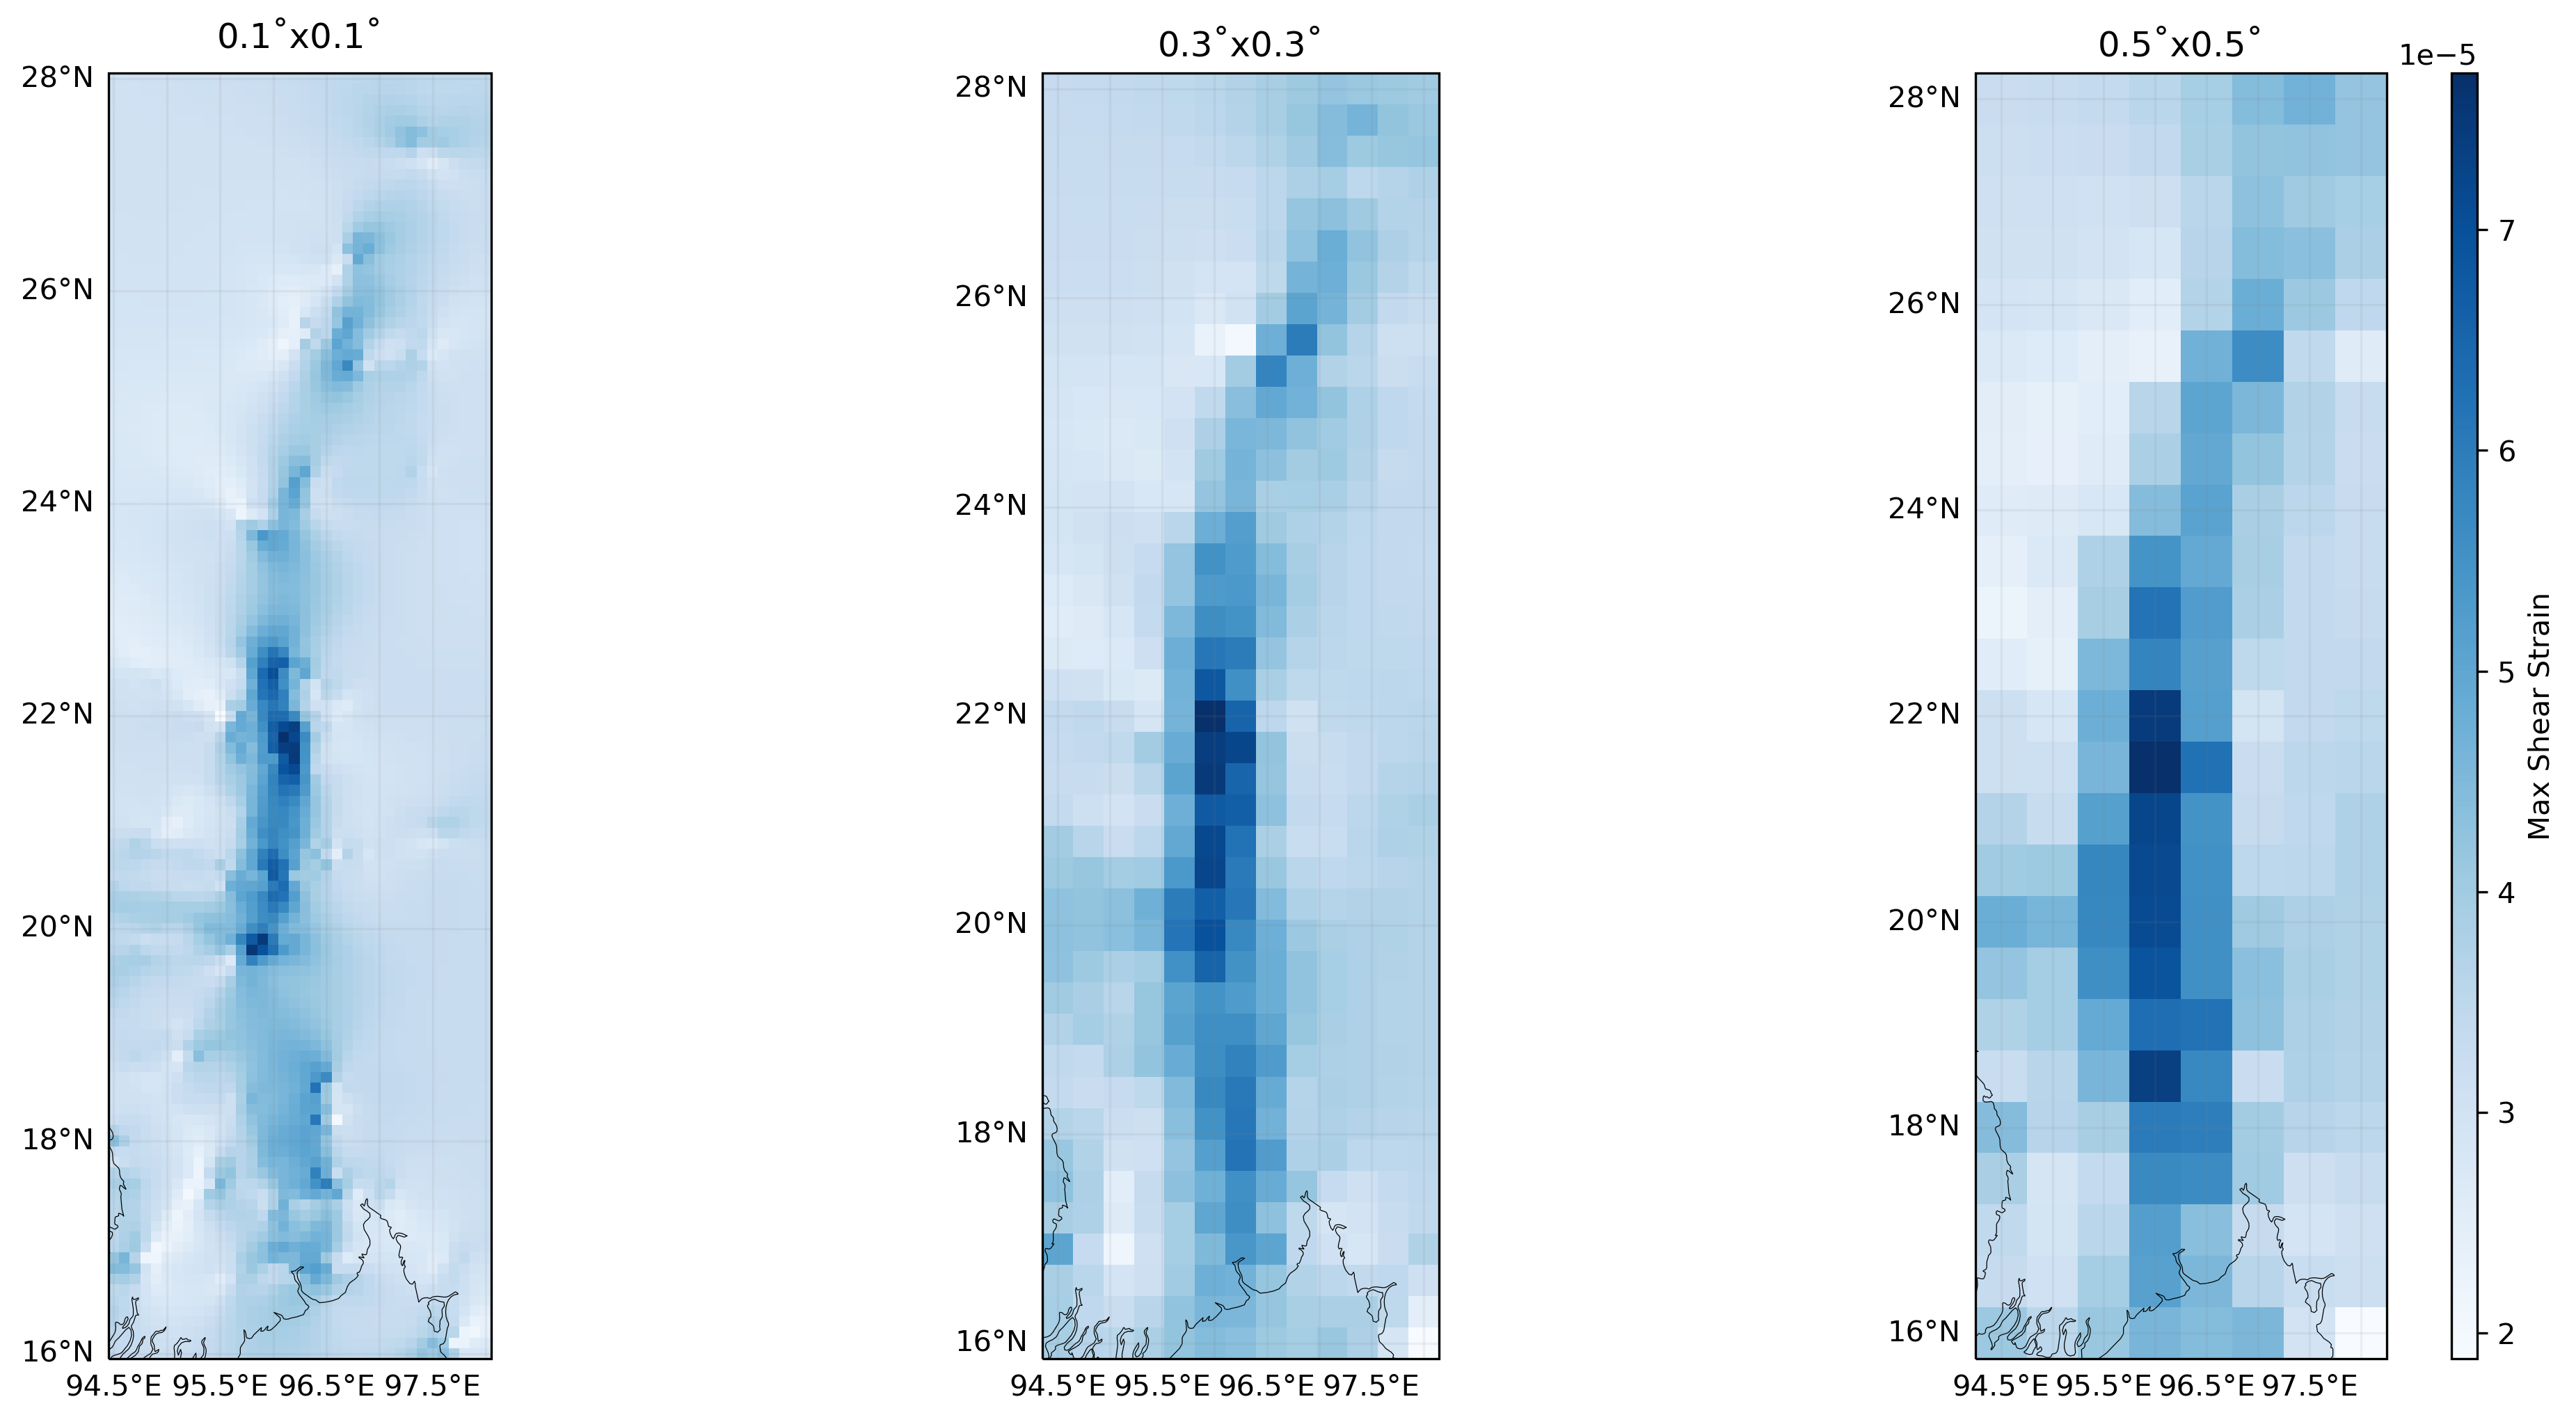

In [12]:
# Plot the results
fig, axes = plt.subplots(1, len(grid_sizes), dpi = 300, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

for ax, grid_size in zip(axes, grid_sizes):
    max_shear_file = os.path.join('Output_gpsgridder', f'I{grid_size}_max_shear.nc')
    ds = xr.open_dataset(max_shear_file)
    max_shear = ds['max_shear']

    # Plot the max shear strain
    c = ax.pcolormesh(max_shear['longitude'], max_shear['latitude'], max_shear, transform=ccrs.PlateCarree(), cmap='Blues')
    ax.coastlines(resolution='10m', color='black', linewidth=0.3)
    ax.set_title(f'{grid_size}˚x{grid_size}˚')
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.1, linestyle='-')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'color': 'black', 'rotation': 0}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add a single colorbar for all subplots
fig.colorbar(c, ax=axes.ravel().tolist(), orientation='vertical', pad=0.02, aspect=50, label='Max Shear Strain')

# # Save the figure to an 'output' folder
# output_dir = 'output'
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
# plt.savefig(os.path.join(output_dir, 'strain_rate_comparison.png'), bbox_inches='tight')

# Display the plot
plt.show()